In [ ]:
#mMount google drive to import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results
pd.set_option('display.max_colwidth', None)

In [ ]:
paths = glob.glob('/content/drive/MyDrive/Images/*.jpg',recursive=True)
paths
#@len(paths)

['/content/drive/MyDrive/Images/schoolshooter16.jpg',
 '/content/drive/MyDrive/Images/schoolshooter17.jpg',
 '/content/drive/MyDrive/Images/schoolshooter20.jpg',
 '/content/drive/MyDrive/Images/schoolshooter26.jpg',
 '/content/drive/MyDrive/Images/schoolshooter8.jpg',
 '/content/drive/MyDrive/Images/schoolshooter3.jpg',
 '/content/drive/MyDrive/Images/schoolshooter22 Copy-of-man-holding-gun-serious-looking_jpgrf8fd255a766e8b57f91f13a6f0af29410.jpg',
 '/content/drive/MyDrive/Images/schoolshooter1.jpg',
 '/content/drive/MyDrive/Images/schoolshooter2.jpg',
 '/content/drive/MyDrive/Images/schoolshooter5.jpg',
 '/content/drive/MyDrive/Images/schoolshooter14.jpg',
 '/content/drive/MyDrive/Images/schoolshooter18.jpg',
 '/content/drive/MyDrive/Images/schoolshooter19.jpg',
 '/content/drive/MyDrive/Images/schoolshooter21.jpg',
 '/content/drive/MyDrive/Images/schoolshooter23.jpg',
 '/content/drive/MyDrive/Images/schoolshooter24.jpg',
 '/content/drive/MyDrive/Images/schoolshooter25.jpg',
 '/conten

In [ ]:
original = np.array([np.asarray(Image.open(img)) for img in paths])
original.shape

<ipython-input-73-85d452cc5a45>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  original = np.array([np.asarray(Image.open(img)) for img in paths])


(31,)

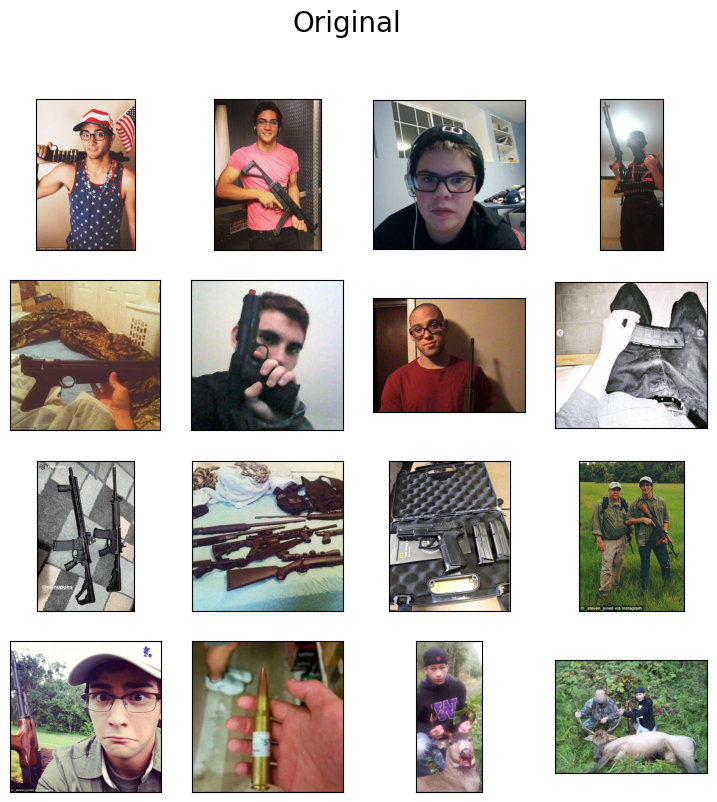

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in original[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Original", fontsize=20)
plt.show() #show the original unedited images

In [ ]:
#Augmenting techniques

In [ ]:
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in original]

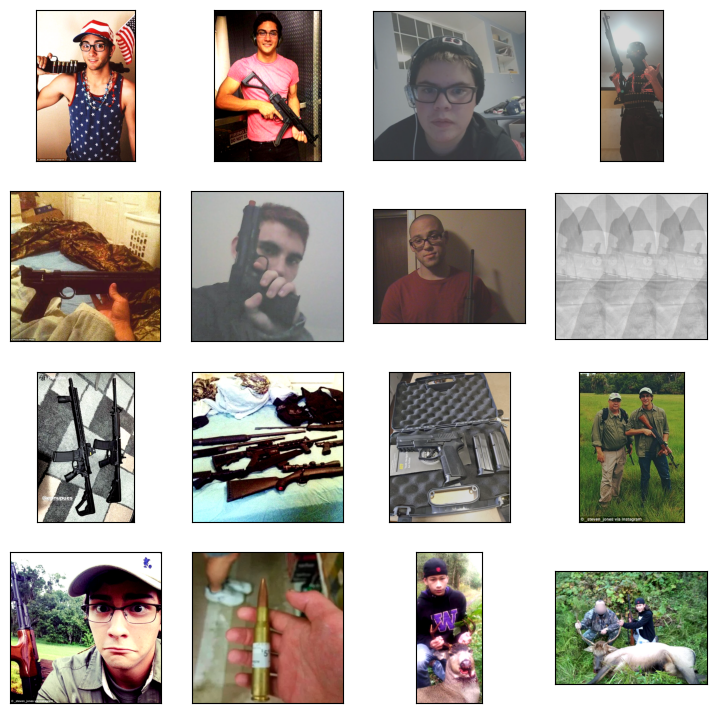

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in contrast[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show() #show what the images look like after contrast

In [ ]:
#More augmenting techniques

In [ ]:
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]


In [ ]:
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]


In [ ]:
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

In [ ]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]


In [ ]:
rotate = [Image.fromarray(img, 'RGB').rotate(np.random.choice([0, 90, 180, 270])) for img in flip]


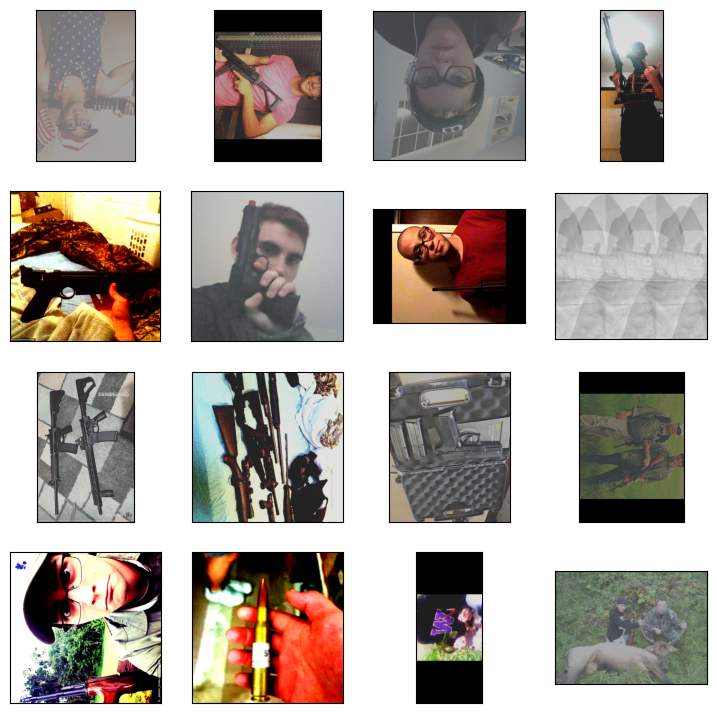

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in rotate[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
import os
for i, image in tqdm(enumerate(rotate)):
  directory = '/content/augmented/' + paths[i].rsplit('/', 2)[1]+ '/'
  os.makedirs(directory, exist_ok = True)
  image.save(directory + paths[i].rsplit('/', 2)[2]) #Save the images to a directory

0it [00:00, ?it/s]

In [ ]:
!zip -r /content/augmentedschool.zip /content/augmented


  adding: content/augmented/ (stored 0%)
  adding: content/augmented/schoolshooter25.jpg (deflated 1%)
  adding: content/augmented/schoolshooter22 Copy-of-man-holding-gun-serious-looking_jpgrf8fd255a766e8b57f91f13a6f0af29410.jpg (deflated 3%)
  adding: content/augmented/schoolshooter33.jpg (deflated 38%)
  adding: content/augmented/schoolshooter17.jpg (deflated 6%)
  adding: content/augmented/schoolshooter20.jpg (deflated 4%)
  adding: content/augmented/schoolshooter23.jpg (deflated 21%)
  adding: content/augmented/schoolshooter28.jpg (deflated 17%)
  adding: content/augmented/schoolshooter16.jpg (deflated 4%)
  adding: content/augmented/schoolshooter34.jpg (deflated 1%)
  adding: content/augmented/schoolshooter3.jpg (deflated 2%)
  adding: content/augmented/schoolshooter32.jpg (deflated 4%)
  adding: content/augmented/schoolshooter5.jpg (deflated 2%)
  adding: content/augmented/schoolshooter9.jpg (deflated 3%)
  adding: content/augmented/schoolshooter14.jpg (deflated 0%)
  adding: con

In [ ]:
from google.colab import files
files.download("/content/augmentedschool.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>